### Testing Evo

#### Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML, Image

from graphUtils import add_edges
from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer
from evo_trainer import Evo_Trainer

#%run Visualizer.py # --allows for reloading the particular code

#### Train the network

In [2]:
n = 10
popsize = 20
generations = 500
name = 'centered5'
#device = torch.device('mps:0')
device = torch.device('cpu')
#trainer = Evo_Trainer(n, device)
trainer = Evo_Trainer(n, device, popsize)

2023-02-16 22:24:40,628	INFO worker.py:1528 -- Started a local Ray instance.


[2023-02-16 22:24:43] INFO     <87215> evotorch.core: Instance of `Custom_NEProblem` (id:4445186816) -- The `dtype` for the problem's decision variables is set as torch.float32
[2023-02-16 22:24:43] INFO     <87215> evotorch.core: Instance of `Custom_NEProblem` (id:4445186816) -- `eval_dtype` (the dtype of the fitnesses and evaluation data) is set as torch.float32
[2023-02-16 22:24:43] INFO     <87215> evotorch.core: Instance of `Custom_NEProblem` (id:4445186816) -- The `device` of the problem is set as cpu
[2023-02-16 22:24:43] INFO     <87215> evotorch.core: Instance of `Custom_NEProblem` (id:4445186816) -- The number of actors that will be allocated for parallelized evaluation is 10
[2023-02-16 22:24:43] INFO     <87215> evotorch.core: Instance of `Custom_NEProblem` (id:4445186816) -- Number of GPUs that will be allocated per actor is None


/Users/martinholst/miniconda3/envs/AML/lib/python3.10/site-packages/evotorch/tools/misc.py:1107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  result = torch.tensor(data, **kwargs)


In [3]:
trainer.train(generations, name)

         iter : 1
     stepsize : ReadOnlyTensor(0.0993)
    mean_eval : 5.571343421936035
  median_eval : 0.7693891525268555
pop_best_eval : 24.77215576171875

         iter : 2
     stepsize : ReadOnlyTensor(0.0986)
    mean_eval : -0.7377336025238037
  median_eval : -2.4895167350769043
pop_best_eval : 12.306173324584961

         iter : 3
     stepsize : ReadOnlyTensor(0.0979)
    mean_eval : 2.774369955062866
  median_eval : 0.7585598826408386
pop_best_eval : 15.74483871459961

         iter : 4
     stepsize : ReadOnlyTensor(0.0973)
    mean_eval : -0.20807874202728271
  median_eval : -1.7827630043029785
pop_best_eval : 14.071560859680176

         iter : 5
     stepsize : ReadOnlyTensor(0.0967)
    mean_eval : 1.230700135231018
  median_eval : 0.8003743290901184
pop_best_eval : 8.845799446105957

         iter : 6
     stepsize : ReadOnlyTensor(0.0962)
    mean_eval : 1.8590959310531616
  median_eval : 0.792863130569458
pop_best_eval : 8.781453132629395

         iter : 7
     st

In [14]:
network = trainer.get_trained_network()

In [15]:
#network = trainer.problem.parameterize_net(trainer.searcher.status['best'][0])
#network = trainer.problem.parameterize_net(trainer.searcher.status['center'][0])

#### Visualize trained network

In [26]:
organism = generate_organism(n, device)
graph = organism.toGraph()
visualizer = Visualizer()
network(graph, 0)

(Data(x=[40, 7], edge_index=[1, 0], device=cpu, attr=[1]),
 tensor([0., 0.]),
 0.0,
 0.0,
 0.0,
 0.0,
 0.0)

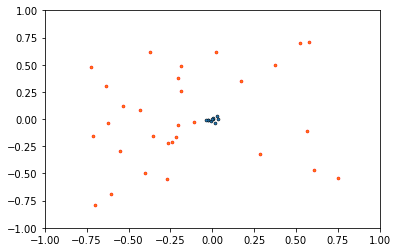

In [27]:
anim = visualizer.animate_organism(graph, network, food=30, frames=60)
visualizer.save_animation_to_gif(anim, name, 10)

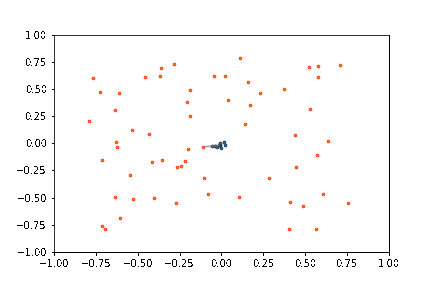

In [28]:
Image('../animation/' + name + '.gif')

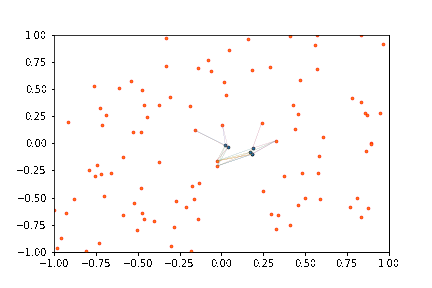

In [9]:
Image('../animation/GATConv1.gif')

In [10]:
anim.frame_seq = anim.new_saved_frame_seq() 
IPython.display.HTML(anim.to_jshtml())

In [11]:
print(network)

CGConv1(
  (conv_layer_cells): CGConv(7, dim=4)
  (conv_layer_food): CGConv(7, dim=4)
  (mlp): Sequential(
    (0): ReLU()
    (1): Linear(in_features=14, out_features=14, bias=True)
    (2): ReLU()
    (3): Linear(in_features=14, out_features=4, bias=True)
    (4): ReLU()
  )
  (mlp_before): Sequential(
    (0): Linear(in_features=7, out_features=7, bias=True)
    (1): ReLU()
    (2): Linear(in_features=7, out_features=7, bias=True)
    (3): ReLU()
  )
)


In [12]:
print('conv_layers1: ', network.conv_layer_cells)
for param in network.conv_layer_cells.parameters():
  print(param.data)

print('conv_layers2: ', network.conv_layer_food)
for param in network.conv_layer_food.parameters():
  print(param.data)

conv_layers1:  CGConv(7, dim=4)
tensor([[ 0.4454, -0.3948, -0.8000, -0.3062,  0.9179,  0.2041,  0.6711,  0.3333,
          0.8192,  0.3486, -0.6872, -0.6546,  0.0909,  0.9230,  0.7389,  1.0029,
         -0.3490, -0.7359],
        [ 0.0325, -0.0572,  0.6617,  0.0128,  0.1222,  0.0277, -0.1371, -0.3796,
          0.3136, -0.2837,  0.1164,  0.1097, -0.2130, -1.0874,  0.0836, -0.4731,
          0.2464,  0.9789],
        [-0.0967,  1.3272, -0.1443, -0.0634,  0.3921, -0.0628, -0.3074,  0.5314,
          0.1294,  0.0348,  0.3324,  0.2007,  0.3867,  0.2237, -0.6098, -0.2198,
          0.8189,  0.3583],
        [ 0.4861, -0.3072,  0.1095, -0.1181, -0.0123, -0.2194, -0.1030,  0.0519,
         -0.2354,  0.0405,  0.3832,  0.8733, -0.1938,  0.2891,  0.0816,  0.4702,
         -0.3767,  0.3517],
        [-0.0756, -0.1026,  0.1961, -0.2644, -0.6240, -0.1683,  0.4523, -0.1434,
          0.0214,  0.2150,  0.3255, -0.3309, -0.6527, -0.2344, -0.1183,  0.1185,
          0.3810,  0.9076],
        [-0.5121, 

In [13]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>